In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)

tr = test.loc[test.x_exit.isnull()]

def conv(time_1):   
    sec1 = 3600*int(time_1[0:2]) + 60*int(time_1[3:5]) + int(time_1[6:8])                                                                                                                                
    return (sec1)

# vec_conv =  np.vectorize(conv)
# train.time_entry=vec_conv(train.time_entry)
# train.time_exit=vec_conv(train.time_exit)

#incohérences
train['vmean'][(train.time_entry==train.time_exit)] = 0
train['vmin'][(train.time_entry==train.time_exit)] = 0
train['vmax'][(train.time_entry==train.time_exit)] = 0

test['vmean'][(test.time_entry==test.time_exit)] = 0
test['vmin'][(test.time_entry==test.time_exit)] = 0
test['vmax'][(test.time_entry==test.time_exit)] = 0

train['vmax'][(train.x_entry==train.x_exit)&(train.y_entry==train.y_exit)] = 0
train['vmin'][(train.x_entry==train.x_exit)&(train.y_entry==train.y_exit)] = 0
train['vmean'][(train.x_entry==train.x_exit)&(train.y_entry==train.y_exit)] = 0

test['vmax'][(test.x_entry==test.x_exit)&(test.y_entry==test.y_exit)] = 0
test['vmin'][(test.x_entry==test.x_exit)&(test.y_entry==test.y_exit)] = 0
test['vmean'][(test.x_entry==test.x_exit)&(test.y_entry==test.y_exit)] = 0

#outliers
train.vmean = train.vmean.loc[(train.vmean<90) & (train.vmean>=0)]
train.vmax = train.vmean.loc[(train.vmax<90) & (train.vmax>=0)]
train.vmin = train.vmean.loc[(train.vmin<90) & (train.vmin>=0)]

#nan by mean
train['vmax']=train['vmax'].replace( np.NaN , train['vmax'].mean() )
train['vmin']=train['vmin'].replace( np.NaN , train['vmin'].mean() )
train['vmean']=train['vmean'].replace( np.NaN , train['vmean'].mean() )

test['vmax']=test['vmax'].replace( np.NaN , test['vmax'].mean() )
test['vmin']=test['vmin'].replace( np.NaN , test['vmin'].mean() )
test['vmean']=test['vmean'].replace( np.NaN , test['vmean'].mean() )

vec_conv =  np.vectorize(conv)
train.time_entry=vec_conv(train.time_entry)
train.time_exit=vec_conv(train.time_exit)

test.time_entry=vec_conv(test.time_entry)
test.time_exit=vec_conv(test.time_exit)

train['city_center'] = 0
train['city_center'][(train.x_exit>=3750901.5068) & (train.x_exit<=3770901.5068)&(train.y_exit>=(-19268905.6133)) & (train.y_exit<=(-19208905.6133))]=1

train = train.drop(['trajectory_id'],axis=1)
test = test.drop(['trajectory_id'],axis=1)

C:\Users\gouzm\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gouzm\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gouzm\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gouzm\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [2]:
a = train.values
c = test.values

In [3]:
b=[]
i=-1
hash = ''
for line in a:
    if line[0] != hash:
        if i>=0:
            b[i] = np.concatenate((b[i][:9],b[i][11:]),axis=None)
            #enlève x_ et y_ du dernier trajet 

        hash = line[0]
        ref = line[1:-1]
        b.append(np.concatenate((line[-1],hash,ref),axis=None))
        i=i+1
    else:
        ref = np.concatenate((line[1:-1],ref), axis=None)
        b[i]=np.concatenate((line[-1],hash,ref),axis=None)

In [4]:
df_train = pd.DataFrame(b)
Y=df_train[0]
X = df_train.drop([0,1],axis=1)
#X=X.fillna(0)
X=X.values
X=X.tolist()

In [5]:
#décale tout
i=0

for line in X:
    while np.isnan(X[i][-1]):
      X[i] = np.concatenate((X[i][:7],X[i][:-7]),axis=None)
    i=i+1

In [6]:
b=[]
i=-1
hash = ''
for line in c:
    if line[0] != hash:
        if i>=0:
            b[i] = np.concatenate((b[i][:8],b[i][10:]),axis=None)
            #enlève x_ et y_ du dernier trajet dans le test cest NaN mais on doit l'enlever quand même
        hash = line[0]
        ref = line[1:]
        b.append(np.concatenate((hash,ref),axis=None))
        i=i+1
    else:
        ref = np.concatenate((line[1:],ref), axis=None)
        b[i]=np.concatenate((hash,ref),axis=None)

In [7]:
df_test = pd.DataFrame(b)

X_test = df_test.drop([0],axis=1)
#X_test=X_test.fillna(0)
X_test=X_test.values
X_test=X_test.tolist()

In [8]:
#décale tout
i=0

for line in X_test:
    while np.isnan(X_test[i][-1]):
      X_test[i] = np.concatenate((X_test[i][:7],X_test[i][:-7]),axis=None)
    i=i+1

In [9]:
from xgboost import XGBClassifier

X=np.asarray(X)
Y=np.asarray(Y)

clf = XGBClassifier(random_state=0,n_jobs=-1)
clf.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [10]:
X_test=np.asarray(X_test)

pred = clf.predict(X_test)
prediction = pd.DataFrame()
trajectory_id = tr['trajectory_id']

trajectory_id=trajectory_id.values
prediction['id']=trajectory_id
prediction['target']=pred

prediction.to_csv("EYChallenge_All_in_one_line_withoutNaN.csv",index=False)

In [11]:
prediction

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0
5,traj_0006535be25bb52dd06983447880c964_5_12,0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,1
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,1
9,traj_000d479078af08618bddc7f09082b8c3_11_6,0


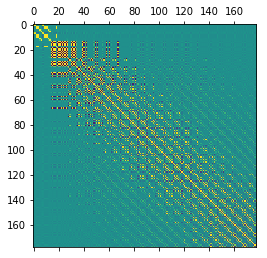

In [14]:
import matplotlib.pyplot as plt

plt.matshow(pd.DataFrame(X_test).corr())
plt.show()